In [6]:

from commonfunctions import *
from classifiers import *
from stemRemoval import stemRemoval
import numpy as np
from staffLine import *
import shutil
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


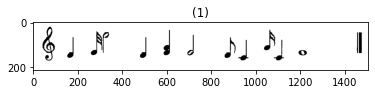

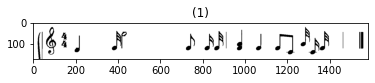

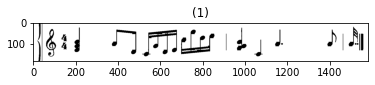

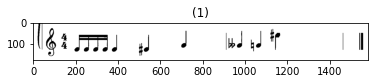

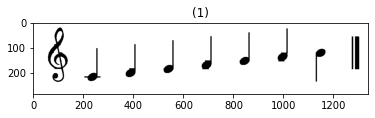

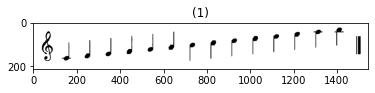

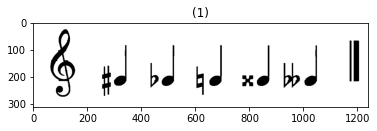

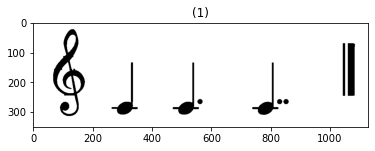

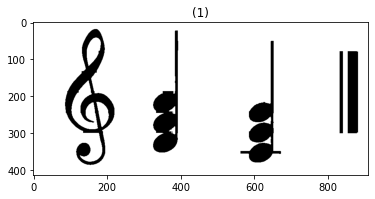

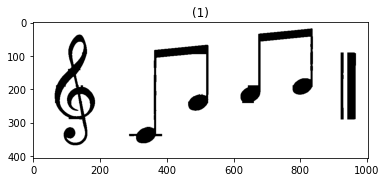

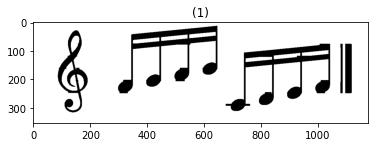

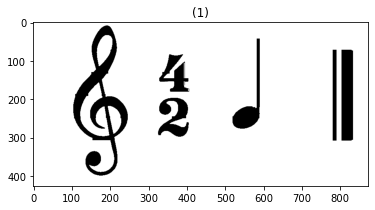

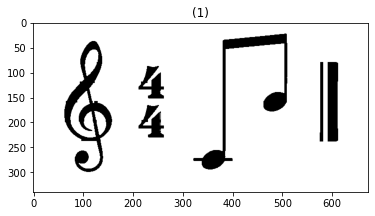

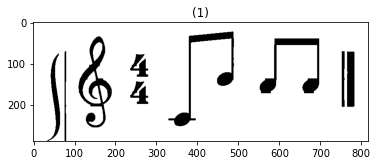

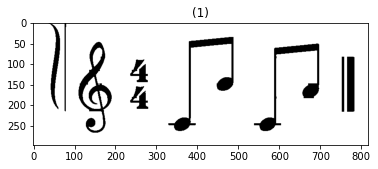

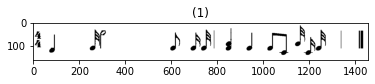

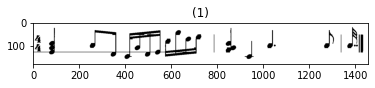

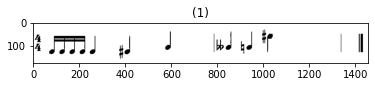

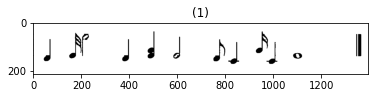

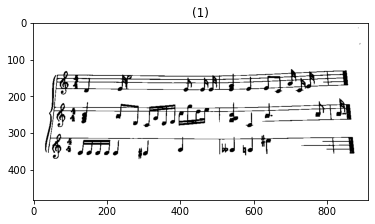

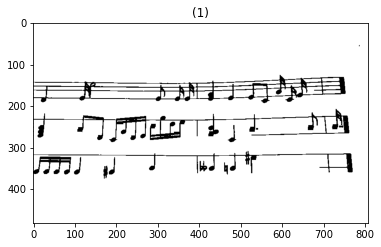

In [26]:
inputImagesDirectory = "./dataset/scanned"
directory = os.fsencode(inputImagesDirectory)
inputImages = []
filenames = []
outputDirectory = './outputs'
try:
    if os.path.exists(outputDirectory) and os.path.isdir(outputDirectory):
        shutil.rmtree(outputDirectory)
        os.mkdir('./outputs')
except:
    print("output file is not empty")

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    filenames.append(os.path.splitext(filename)[0])
    image = img_as_ubyte(io.imread(os.path.join(inputImagesDirectory, filename), as_gray=True))
    inputImages.append(image)

for imageIndex in range(len(inputImages)):
    output = []
    img = inputImages[imageIndex]

    img_median_filtered = hybridMedian(img).astype('uint8')
    # img_median_filtered = median(noisy_img)
    # gaussian filtering
    img_gaussian_filtered = img_as_ubyte(gaussian(img_median_filtered, sigma=0.2))

    # image rotation
    image_rotated = img_as_ubyte(skew_angle_hough_transform(img_gaussian_filtered))

    # image binarization
    binary = adaptiveThresh(image_rotated, t=15, div=8)

    # removing stafflines
    img_staffLines_removed, staffLines, staffLineSpacing, staffHeight = staffLineRemoval(
        binary, 1)

    # split each object in the score to be identified
    objects = split_objects(binary, img_staffLines_removed, staffLines)

    # templates to be used to classify the reltively short symbols with SIFT
    templates = read_all_templates()

    # if the score had multiple groups we divide them into blocks that have 5 stafflines
    sameBlock = objects[0][2]

    # each block has different pitches coordinates
    pitches, pitches_coord = getPitchesCoordinates(staffLineSpacing, staffLines, sameBlock)

    for object, top, blockNumber, dots in objects:
        # if the we entered a new block recalculte the pitches coordinates
        if sameBlock != blockNumber:
            output.append('\n')
            sameBlock = blockNumber
            pitches, pitches_coord = getPitchesCoordinates(
                staffLineSpacing, staffLines, blockNumber)

        # classify the relatively short symbols using SIFT
        if len(object) < 3.5*staffLineSpacing:
            # show_images([object])
            objectLabel = classify_accidentals(
                (object, top, blockNumber), templates, staffLineSpacing)
            if objectLabel == 'full_note':
                objectLabel = pitches[find_nearest(
                    pitches_coord, top + len(object)/2)] + '/1'
                objectLabel = objectLabel + '.' * dots
            output.append(objectLabel)
            continue
        objectWithouStem, stems = stemRemoval(object, staffLineSpacing)
        # show_images([object, objectWithouStem])
        if len(stems) == 0:
            continue
        elif len(stems) == 1:
            note = ChordsClassifier(objectWithouStem, top, staffLineSpacing, pitches, pitches_coord)
            if note != '':
                output.append(note)
                continue
            note = classifierA(objectWithouStem, stems, staffLineSpacing,
                        staffHeight, top, pitches, pitches_coord, dots)
            if note != '':
                output.append(note)
        else:
            try:
                notes = beamClassifier(object, objectWithouStem, staffLineSpacing,
                        staffHeight, top, pitches, pitches_coord)
                output.extend(notes)
            except:
                continue

    with open("./outputs/" + filenames[imageIndex] + '.txt', 'w') as f:
        for item in output:
            f.write("%s " % item)
        


In [ ]:
for img in dataset:
    binary = img > threshold_otsu(img)
    binary1 = adaptiveThresh(img, t = 15, div = 8)
    show_images([img, binary, binary1], ["original image", "otsu image", "adaptive image"])


In [ ]:
# testing salt and pepper noise
noisy_images = []
for img in dataset:
    noisy_image = random_noise(img, mode='s&p', amount=0.05)
    noisy_image = (noisy_image * 255).astype(np.uint8)
    noisy_images.append(noisy_image)

for noisy_img in noisy_images:
    h_filtered_img = hybridMedian(noisy_img)
    filtered_img = median(noisy_img)
    show_images([noisy_img, filtered_img, h_filtered_img], ["noisy_img", "filtered image", "hybrid filtered image"])


In [13]:
'y' + 'x'*0

'y'

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(tmp, None)
kp2, des2 = sift.detectAndCompute(obj, None)
bf = cv2.BFMatcher()

NameError: name 'tmp' is not defined

In [24]:
"./outputs" + filenames[0] + '.txt'

'./outputs.PNG.txt'